In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import re
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('playlists-v4-final.csv')
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.817   0.509    0    -4.170     1       0.0839        0.1460   
1         0.724   0.846    9    -3.785     0       0.0538        0.1090   
2         0.749   0.535    4    -6.785     1       0.0336        0.0131   
3         0.774   0.959    1    -2.907     1       0.1830        0.1130   
4         0.961   0.739    9    -6.665     1       0.2240        0.0794   

   instrumentalness  liveness  valence    tempo                      id  \
0          0.000025    0.1110    0.770   99.988  3XEdqQtGHAM5huMrs3RaKN   
1          0.000000    0.0958    0.640  129.959  2tVkFxyePqB0o4Y4SYKV0Q   
2          0.000036    0.0982    0.601  123.042  0ClPIeT6MSgfSgQ9ZrJbAq   
3          0.000000    0.0902    0.860  114.989  5UCTT2liT61iPL2cCV9Gto   
4          0.000000    0.0372    0.759  119.960  34JfHOd0fcefm4FSPSrIhF   

   duration_ms  time_signature       song_title  popularity_scores      genre  
0       183930               4      Acid Dreams                 55  dance pop  
1       187251               4           Breath                 47      k-pop  
2       196607               4  Cheating on You                 77  dance pop  
3       210535               4           CHERRY                 43      k-pop  
4       150053               4     Cold Blooded                 65      k-pop

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       8185 non-null   float64
 1   energy             8185 non-null   float64
 2   key                8185 non-null   int64  
 3   loudness           8185 non-null   float64
 4   mode               8185 non-null   int64  
 5   speechiness        8185 non-null   float64
 6   acousticness       8185 non-null   float64
 7   instrumentalness   8185 non-null   float64
 8   liveness           8185 non-null   float64
 9   valence            8185 non-null   float64
 10  tempo              8185 non-null   float64
 11  id                 8185 non-null   object 
 12  duration_ms        8185 non-null   int64  
 13  time_signature     8185 non-null   int64  
 14  song_title         8183 non-null   object 
 15  popularity_scores  8185 non-null   int64  
 16  genre              7553 

In [4]:
data.describe()

danceability       energy          key     loudness         mode  \
count   8185.000000  8185.000000  8185.000000  8185.000000  8185.000000   
mean       0.576574     0.584701     5.184362    -8.875520     0.635064   
std        0.177546     0.261692     3.537586     5.700235     0.481442   
min        0.059600     0.000292     0.000000   -41.122000     0.000000   
25%        0.458000     0.406000     2.000000   -10.678000     0.000000   
50%        0.588000     0.619000     5.000000    -7.290000     1.000000   
75%        0.710000     0.803000     8.000000    -5.140000     1.000000   
max        0.980000     0.999000    11.000000     1.023000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  8185.000000   8185.000000       8185.000000  8185.000000  8185.000000   
mean      0.080366      0.386300          0.143890     0.178549     0.505254   
std       0.082275      0.345791          0.308137     0.138953     0.268313   
min       0.023100      0.000001          0.000000     0.019200     0.025900   
25%       0.035800      0.052400          0.000000     0.095200     0.286000   
50%       0.047100      0.290000          0.000021     0.122000     0.507000   
75%       0.082500      0.709000          0.014100     0.225000     0.730000   
max       0.763000      0.996000          0.998000     0.982000     0.996000   

             tempo   duration_ms  time_signature  popularity_scores  
count  8185.000000  8.185000e+03     8185.000000        8185.000000  
mean    119.757166  2.310990e+05        3.839218          41.557117  
std      30.358558  1.273164e+05        0.505397          23.320909  
min      35.302000  3.215400e+04        1.000000           0.000000  
25%      96.782000  1.801600e+05        4.000000          26.000000  
50%     117.941000  2.147070e+05        4.000000          44.000000  
75%     138.931000  2.588930e+05        4.000000          60.000000  
max     220.023000  4.423000e+06        5.000000          97.000000

In [5]:
data['duration_ms'] = data['duration_ms']/1000 # convert to minutes
data.describe()

danceability       energy          key     loudness         mode  \
count   8185.000000  8185.000000  8185.000000  8185.000000  8185.000000   
mean       0.576574     0.584701     5.184362    -8.875520     0.635064   
std        0.177546     0.261692     3.537586     5.700235     0.481442   
min        0.059600     0.000292     0.000000   -41.122000     0.000000   
25%        0.458000     0.406000     2.000000   -10.678000     0.000000   
50%        0.588000     0.619000     5.000000    -7.290000     1.000000   
75%        0.710000     0.803000     8.000000    -5.140000     1.000000   
max        0.980000     0.999000    11.000000     1.023000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  8185.000000   8185.000000       8185.000000  8185.000000  8185.000000   
mean      0.080366      0.386300          0.143890     0.178549     0.505254   
std       0.082275      0.345791          0.308137     0.138953     0.268313   
min       0.023100      0.000001          0.000000     0.019200     0.025900   
25%       0.035800      0.052400          0.000000     0.095200     0.286000   
50%       0.047100      0.290000          0.000021     0.122000     0.507000   
75%       0.082500      0.709000          0.014100     0.225000     0.730000   
max       0.763000      0.996000          0.998000     0.982000     0.996000   

             tempo  duration_ms  time_signature  popularity_scores  
count  8185.000000  8185.000000     8185.000000        8185.000000  
mean    119.757166   231.099043        3.839218          41.557117  
std      30.358558   127.316399        0.505397          23.320909  
min      35.302000    32.154000        1.000000           0.000000  
25%      96.782000   180.160000        4.000000          26.000000  
50%     117.941000   214.707000        4.000000          44.000000  
75%     138.931000   258.893000        4.000000          60.000000  
max     220.023000  4423.000000        5.000000          97.000000

In [7]:
data = data.drop(columns=['id'])
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.817   0.509    0    -4.170     1       0.0839        0.1460   
1         0.724   0.846    9    -3.785     0       0.0538        0.1090   
2         0.749   0.535    4    -6.785     1       0.0336        0.0131   
3         0.774   0.959    1    -2.907     1       0.1830        0.1130   
4         0.961   0.739    9    -6.665     1       0.2240        0.0794   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000025    0.1110    0.770   99.988      183.930               4   
1          0.000000    0.0958    0.640  129.959      187.251               4   
2          0.000036    0.0982    0.601  123.042      196.607               4   
3          0.000000    0.0902    0.860  114.989      210.535               4   
4          0.000000    0.0372    0.759  119.960      150.053               4   

        song_title  popularity_scores      genre  
0      Acid Dreams                 55  dance pop  
1           Breath                 47      k-pop  
2  Cheating on You                 77  dance pop  
3           CHERRY                 43      k-pop  
4     Cold Blooded                 65      k-pop

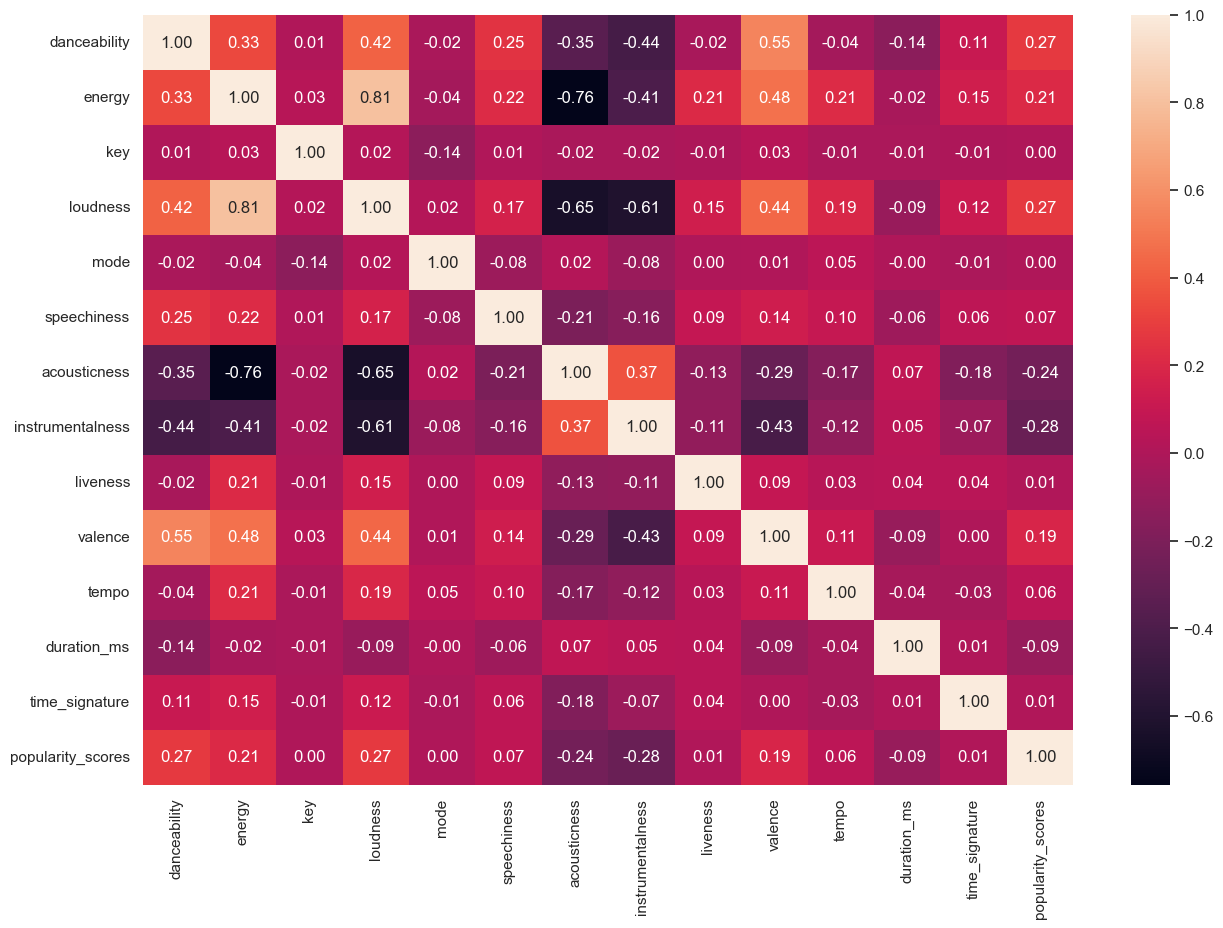

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True, fmt=".2f",);

In [18]:
#look at popularity feature, plotting top 10 popular songs
data.sort_values(by = 'popularity_scores', ascending=False).head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
4000         0.637   0.643    4    -6.571     1       0.0519       0.13000   
3982         0.561   0.965    7    -3.673     0       0.0343       0.00383   
3986         0.520   0.731    6    -5.338     0       0.0557       0.34200   
3997         0.565   0.636    0    -8.198     1       0.0638       0.10700   
1280         0.464   0.417    0    -9.345     0       0.0256       0.13600   
4470         0.643   0.363    0   -11.738     1       0.0767       0.69000   
1524         0.520   0.731    6    -5.338     0       0.0557       0.34200   
7982         0.908   0.546    8   -10.491     0       0.3230       0.01270   
7974         0.749   0.630    4    -6.652     0       0.1160       0.06230   
2329         0.637   0.715    2    -4.971     0       0.0455       0.14800   

      instrumentalness  liveness  valence    tempo  duration_ms  \
4000          0.000002    0.1420    0.533   97.008      200.690   
3982          0.000007    0.3710    0.304  128.040      175.238   
3986          0.001010    0.3110    0.662  173.930      167.303   
3997          0.000010    0.4470    0.525  170.010      179.551   
1280          0.022000    0.0974    0.479   67.528      183.956   
4470          0.000052    0.1150    0.230  139.865      174.783   
1524          0.001010    0.3110    0.662  173.930      167.303   
7982          0.000000    0.0707    0.225  131.016      170.502   
7974          0.000000    0.3530    0.445  122.030      242.027   
2329          0.000000    0.0892    0.308  141.872      210.576   

      time_signature                                      song_title  \
4000               4                                       Anti-Hero   
3982               4                                 I'm Good (Blue)   
3986               4                                       As It Was   
3997               4                                            SNAP   
1280               4                                I Wanna Be Yours   
4470               4                                   Midnight Rain   
1524               4                                       As It Was   
7982               4                              Major Distribution   
7974               4           Pussy & Millions (feat. Travis Scott)   
2329               4  STAR WALKIN' (League of Legends Worlds Anthem)   

      popularity_scores             genre  
4000                 97               pop  
3982                 97          big room  
3986                 93               pop  
3997                 92             alt z  
1280                 92       garage rock  
4470                 91               pop  
1524                 91               pop  
7982                 90  canadian hip hop  
7974                 90  canadian hip hop  
2329                 89    lgbtq+ hip hop

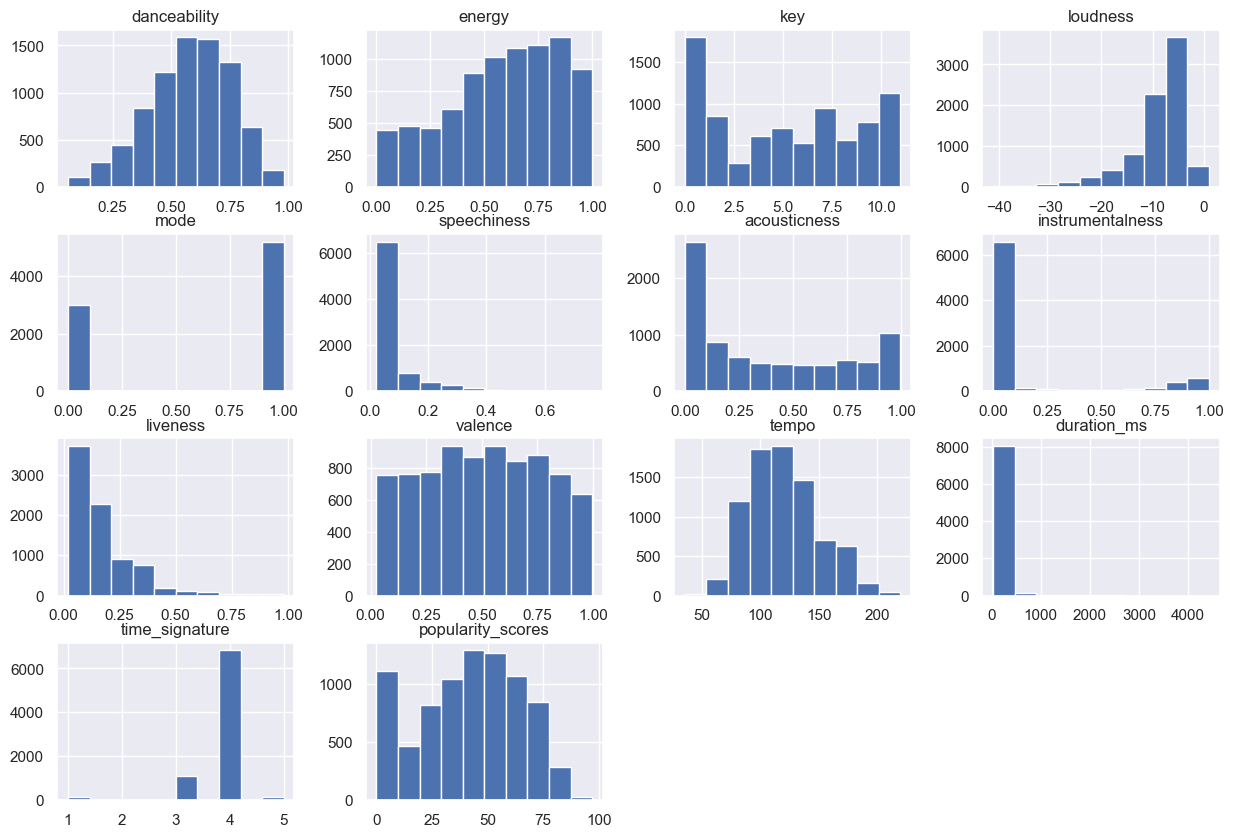

In [19]:
data.hist();

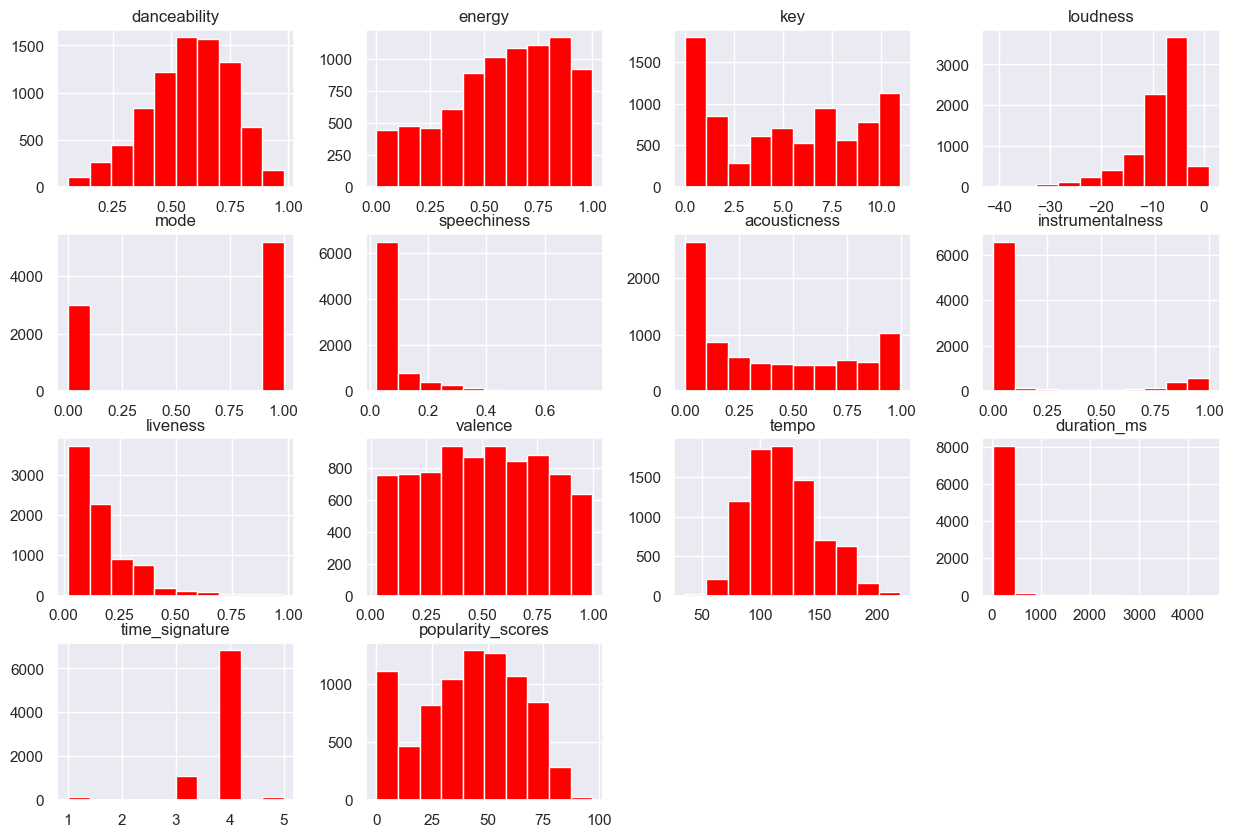

In [20]:
data_top_1000 = data.sort_values(by = 'popularity_scores', ascending=False).head(10000)
data_top_1000.hist(color='red');

<AxesSubplot:xlabel='popularity_scores', ylabel='acousticness'>

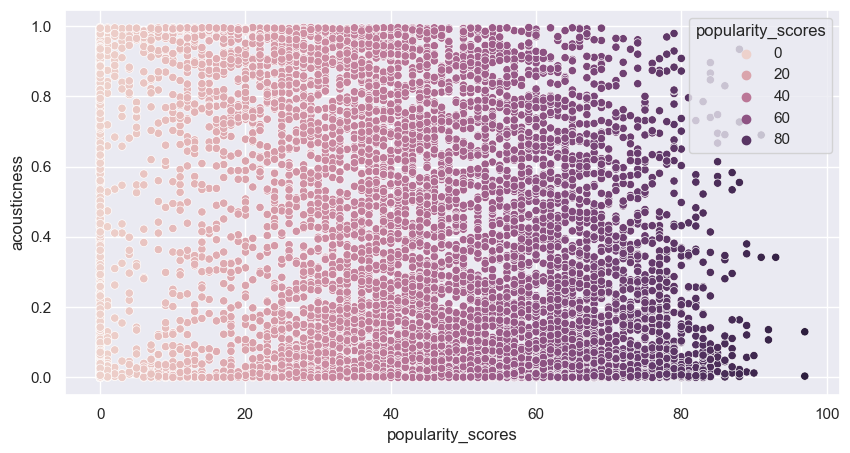

In [21]:
#Plots
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'acousticness', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='energy'>

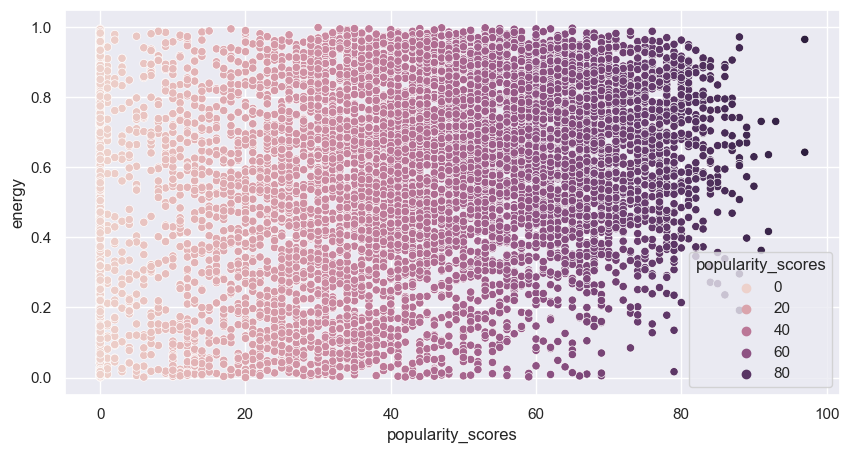

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'energy', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='instrumentalness'>

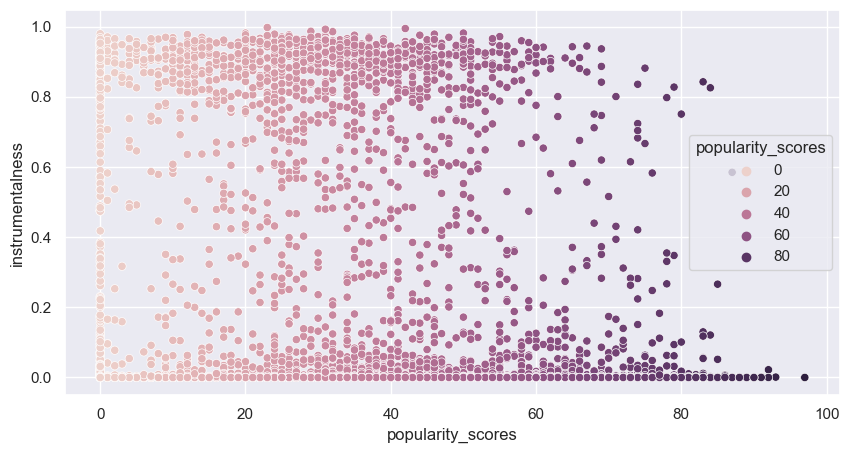

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'instrumentalness', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='loudness'>

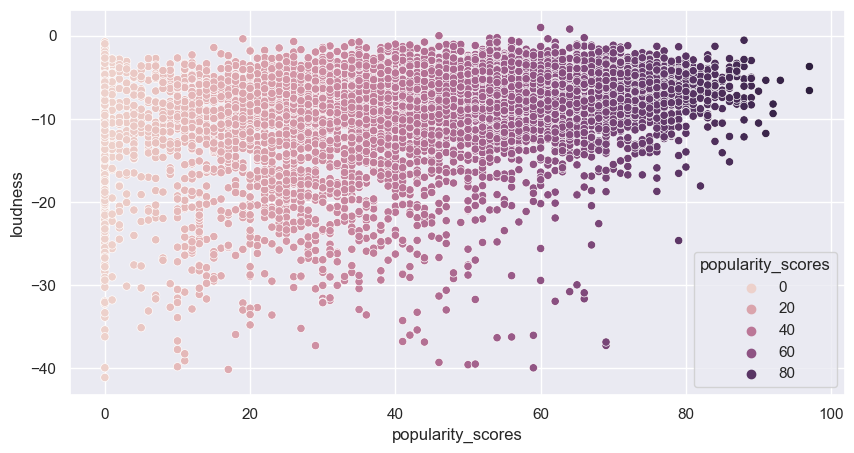

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'loudness', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='speechiness'>

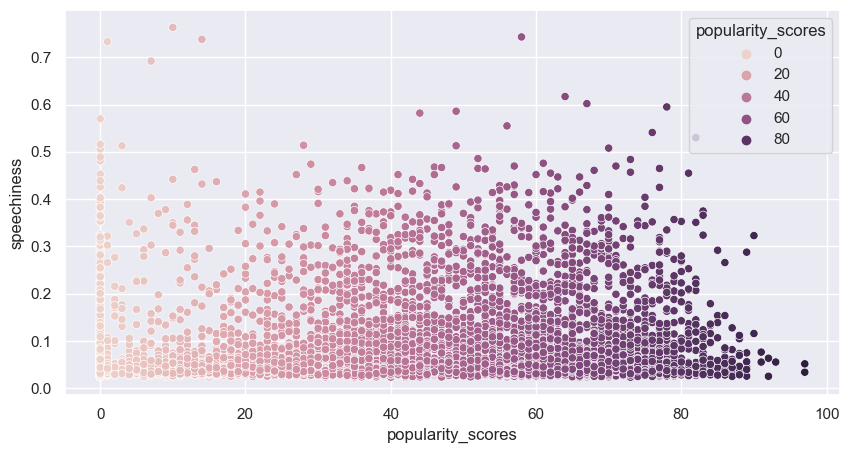

In [25]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'speechiness', hue = 'popularity_scores')


<AxesSubplot:xlabel='popularity_scores', ylabel='valence'>

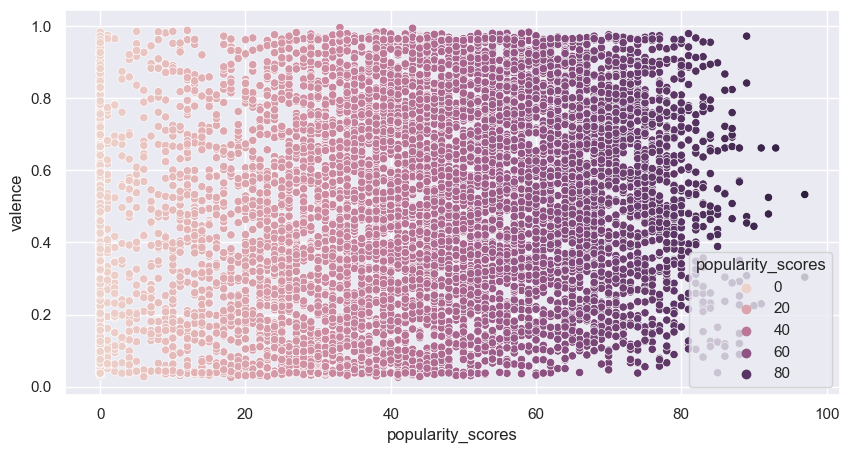

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'valence', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='danceability'>

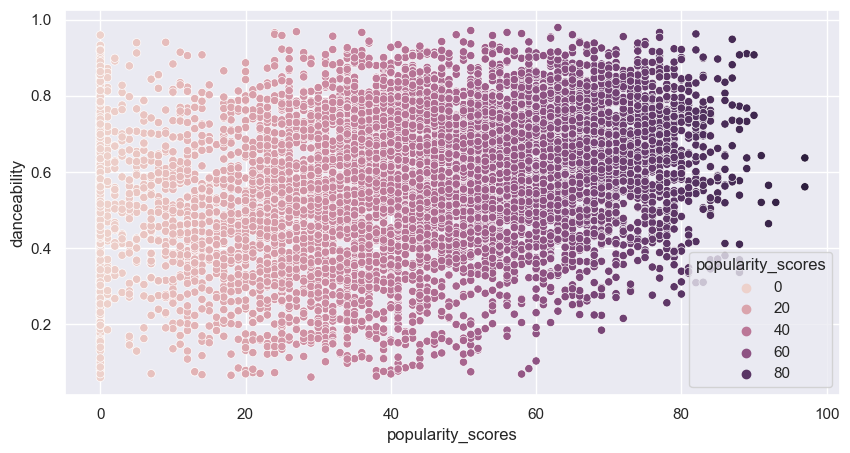

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'danceability', hue = 'popularity_scores')

# Lower speechiness seems better for popularity
# Higher loudness seems better for popularity
# Acousticness, instrumentalness, valence, energy and danceability features are not helpful 

Check valence less or equal than 0.3 to see if more sad or angry songs are more popular

<AxesSubplot:xlabel='popularity_scores', ylabel='valence'>

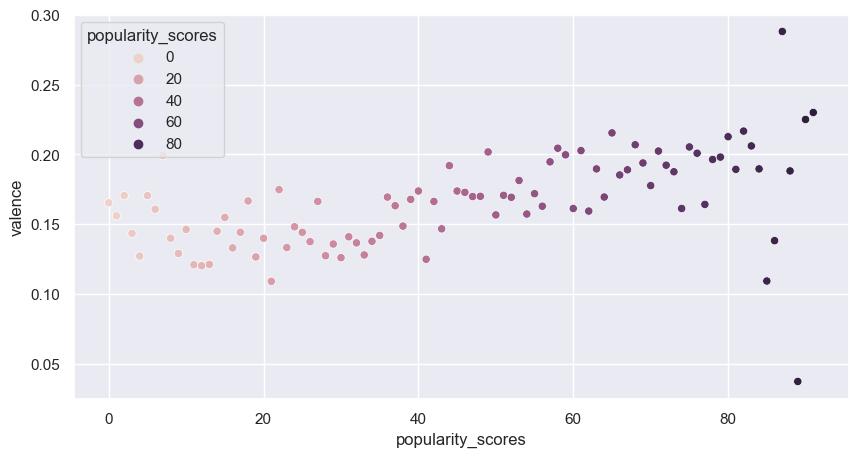

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
data_low_val = data.query('valence<=0.3')
sns.scatterplot(data = data_low_val.groupby(by = 'popularity_scores').mean().reset_index(), x = 'popularity_scores', y = 'valence',
                hue = 'popularity_scores')

# Again, not helpful!

## Regression plot - Loudness and Energy correlation

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

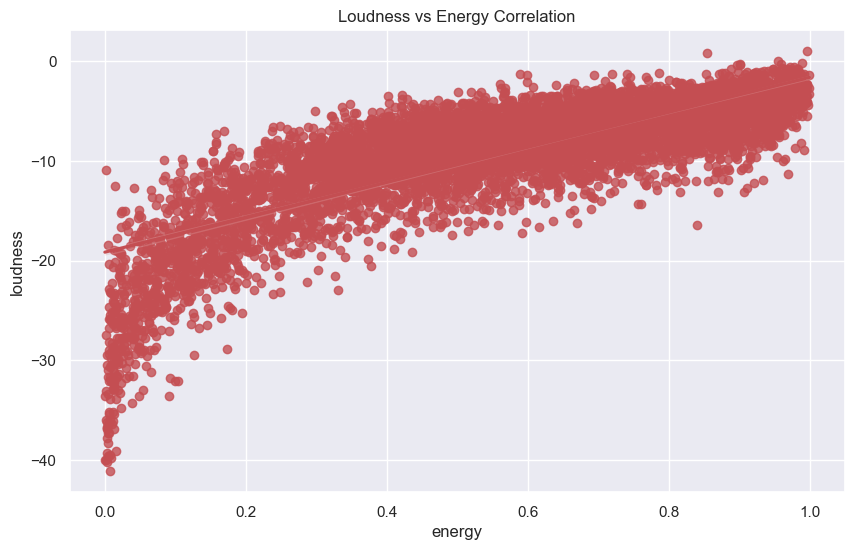

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y='loudness', x='energy', color='r').set(title='Loudness vs Energy Correlation')

##  Regression plot - Popularity and Acousticness correlation

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

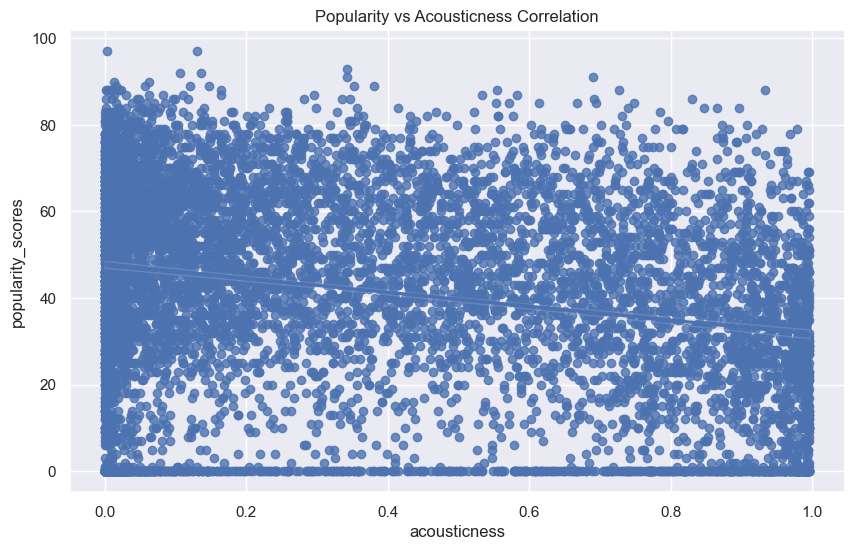

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y='popularity_scores', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')


## Duration of songs for different genres

Text(0, 0.5, 'Genres')

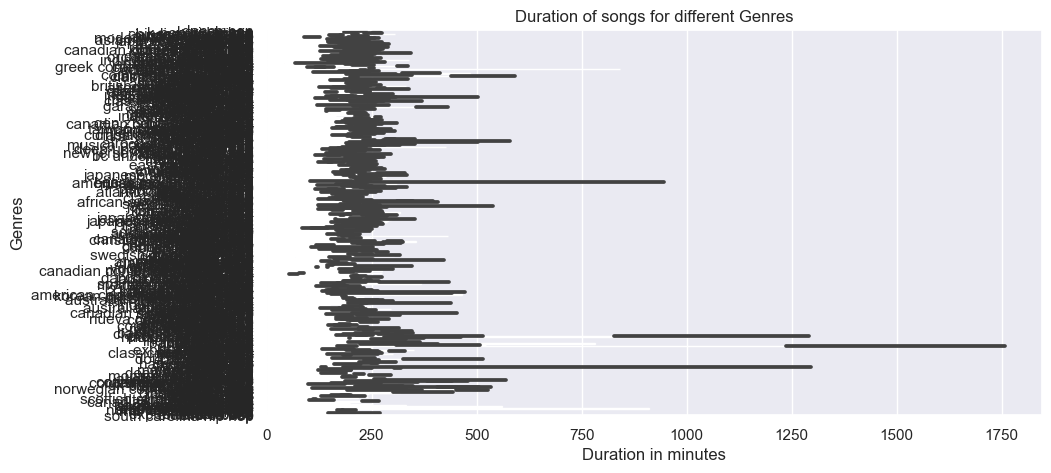

In [31]:
plt.title('Duration of songs for different Genres')
sns.color_palette('magma', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=data)
plt.xlabel('Duration in minutes')
plt.ylabel('Genres')

## Top genres by popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

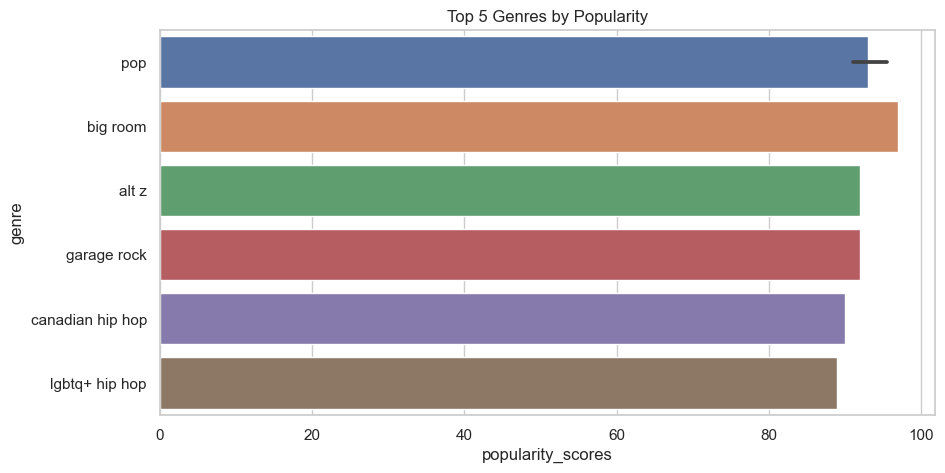

In [32]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,5))
popular = data.sort_values('popularity_scores', ascending=False).head(10)
sns.barplot(y = 'genre', x = 'popularity_scores', data = popular).set(title='Top 5 Genres by Popularity')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm